# CISC 351 - Advanced Data Analytics
## Term Project (Winter 2019)
### Home Credit Default Risk
### Mike Cruickshank


Data set is from the Home Credit Default Risk prediction competition on Kaggle
* https://www.kaggle.com/c/home-credit-default-risk

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [116]:
import matplotlib

### Import Data:

In [ ]:
app_test = pd.read_csv("application_test.csv")

In [224]:
app_train = pd.read_csv("application_train.csv")
app_train_copy = app_train.copy()

In [225]:
app_train = app_train_copy

In [49]:
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments = pd.read_csv("installments_payments.csv")
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
previous_app = pd.read_csv("previous_application.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [51]:
#columns_description = pd.read_csv("HomeCredit_columns_description.csv")


### EDA:

In [64]:
print("Size of Data Sources:\n")
print("app_train: %d x %d" % (np.shape(app_train)))
print("app_test: %d x %d" % (np.shape(app_test)))
print("bureau: %d x %d" % (np.shape(bureau)))
print("bureau_balance: %d x %d" % (np.shape(bureau_balance)))
print("credit_card_balance: %d x %d" % (np.shape(credit_card_balance)))
print("installments: %d x %d" % (np.shape(installments)))
print("previous_app: %d x %d" % (np.shape(previous_app)))
print("sample_submission: %d x %d" % (np.shape(sample_submission)))




Size of Data Sources:

app_train: 307511 x 122
app_test: 48744 x 121
bureau: 1716428 x 17
bureau_balance: 27299925 x 3
credit_card_balance: 3840312 x 23
installments: 13605401 x 8
previous_app: 1670214 x 37
sample_submission: 48744 x 2


In [65]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Check for missing values in each data set:

In [102]:
def CheckMissingValues(df, display_num = 10):
    percent_missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    percent_missing = pd.concat([percent_missing],axis=1,keys=['Percent Missing'])
    print("\n")
    print(percent_missing.head(display_num))
    return


In [103]:
CheckMissingValues(app_train)
CheckMissingValues(app_test)
CheckMissingValues(bureau)
CheckMissingValues(bureau_balance)



                          Percent Missing
COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953


                          Percent Missing
COMMONAREA_MEDI                 68.716150
COMMONAREA_AVG                  68.716150
COMMONAREA_MODE                 68.716150
NONLIVINGAPARTMENTS_MODE        68.412523
NONLIVINGAPARTMENTS_MEDI        68.412523
NONLIVINGAPARTMENTS_AVG         68.412523
FONDKAPREMONT_MODE              67.284179
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAPARTMENTS_MEDI           67.249302
LIVINGAPARTMENTS_MODE           67.249302


                        Percent Missing
AMT_ANNUITY                   

In [104]:
CheckMissingValues(credit_card_balance)
CheckMissingValues(installments)
CheckMissingValues(pos_cash_balance)
CheckMissingValues(previous_app)



                            Percent Missing
AMT_PAYMENT_CURRENT               19.998063
AMT_DRAWINGS_OTHER_CURRENT        19.524872
CNT_DRAWINGS_POS_CURRENT          19.524872
CNT_DRAWINGS_OTHER_CURRENT        19.524872
CNT_DRAWINGS_ATM_CURRENT          19.524872
AMT_DRAWINGS_ATM_CURRENT          19.524872
AMT_DRAWINGS_POS_CURRENT          19.524872
CNT_INSTALMENT_MATURE_CUM          7.948208
AMT_INST_MIN_REGULARITY            7.948208
SK_DPD_DEF                         0.000000


                        Percent Missing
AMT_PAYMENT                    0.021352
DAYS_ENTRY_PAYMENT             0.021352
AMT_INSTALMENT                 0.000000
DAYS_INSTALMENT                0.000000
NUM_INSTALMENT_NUMBER          0.000000
NUM_INSTALMENT_VERSION         0.000000
SK_ID_CURR                     0.000000
SK_ID_PREV                     0.000000


                       Percent Missing
CNT_INSTALMENT_FUTURE         0.260835
CNT_INSTALMENT                0.260675
SK_DPD_DEF                    0.0

Distribution of target variable:

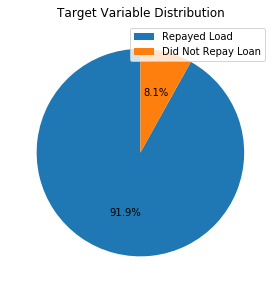

In [141]:
temp = app_train['TARGET'].value_counts()
labels = ['Repayed Load','Did Not Repay Loan']
plt.pie(temp.values,
       autopct='%1.1f%%', startangle = 90)
plt.tight_layout()
plt.title('Target Variable Distribution')
plt.legend(labels, loc="upper right")
plt.show()


### Data Pre-Processing

In [226]:
app_train_target = app_train['TARGET']
app_train = app_train.drop(columns = ['TARGET'])



In [241]:
app_train.sort_values(by=['SK_ID_CURR']).head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,1,0,0,1,0,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,1,0,0,1
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,1,0,0,1
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,1,0,0,1


In [245]:
train.sort_values(by=['SK_ID_CURR']).head()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [199]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    cat_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = cat_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [228]:
app_train, cat_cols = one_hot_encoder(app_train)

Split into Train and Test Set:

In [230]:
from sklearn.model_selection import train_test_split

train, test, train_target, test_target = train_test_split(app_train, app_train_target, test_size = 0.2)

Scale and Imput Data:

In [243]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.impute import SimpleImputer

imputer = Imputer(strategy = 'median')
scaler = StandardScaler()

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)
#app_train = imputer.transform(app_train)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Baseline Models( application_test table only)

#### Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs')
LR.fit(train, train_target)
test_predictions = LR.predict(test)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [262]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy: %.3f' % LR.score(test, test_target))
class_report = classification_report(test_target, test_predictions)
print(class_report)

con_mat = confusion_matrix(test_target, test_predictions)
print(con_mat)
tn, fp, fn, tp = confusion_matrix(test_target, test_predictions).ravel()
print("TP: %d" % tp)
print("TN: %d" % tn)
print("FP: %d" % fp)
print("FN: %d" % fn)


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56591
           1       0.39      0.01      0.02      4912

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.66      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503

[[56516    75]
 [ 4864    48]]
TP: 48
TN: 56516
FP: 75
FN: 4864


#### LightGBM (With Gradient Boosting)

In [278]:
import lightgbm as lgb 

d_train = lgb.Dataset(train, label=train_target)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 50
params['max_depth'] = 10

LGBM = lgb.train(params, d_train, 1000)

In [279]:
test_predictions = LGBM.predict(test)
for i in range(0,np.size(test_predictions)):
    if test_predictions[i]>=.5:       # setting threshold to .5
       test_predictions[i]=1
    else:  
       test_predictions[i]=0

In [280]:
a = np.where(test_predictions == 1)
print(a)

(array([ 1079,  8382, 11101, 11562, 18599, 18974, 19581, 22476, 26119,
       31083, 33661, 37027, 39472, 40100, 40570, 42960, 43856, 45114,
       47183, 48045, 52141, 54938], dtype=int64),)


In [282]:
print('Accuracy: %.3f' % accuracy_score(test, test_target))
class_report = classification_report(test_target, test_predictions)
print(class_report)

con_mat = confusion_matrix(test_target, test_predictions)
print(con_mat)
tn, fp, fn, tp = confusion_matrix(test_target, test_predictions).ravel()
print("TP: %d" % tp)
print("TN: %d" % tn)
print("FP: %d" % fp)
print("FN: %d" % fn)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56591
           1       0.55      0.00      0.00      4912

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.73      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

[[56581    10]
 [ 4900    12]]
TP: 12
TN: 56581
FP: 10
FN: 4900
